# Projet Kaggle

### Etape 1 : chargement et visualisation des données 

In [3]:
# Bibliotheques utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
# Modèles classiques
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
import pickle
import joblib
import time

In [4]:
# Chargemenet et affichage de la base de données
data_credit=pd.read_csv('/Users/youss/Documents/Projet Kaggle/creditcard_2023.csv')
data_credit.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
# Verification de la base de données
data_credit.info()
data_credit.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Etape 2: Analyse exploratoire

In [6]:
# Variable Class
# Compter le nombre de transactions frauduleuses et normales
counts = data_credit['Class'].value_counts()

print(f"Nombre de transactions normales (0) : {counts[0]}")
print(f"Nombre de transactions frauduleuses (1) : {counts[1]}")

fraude_pourcentage = data_credit['Class'].value_counts(normalize=True) * 100
print(fraude_pourcentage)

# Calculer le ratio
ratio = counts[0] / counts[1]
print(f"Ratio : 1 fraude pour {ratio:.0f} transactions normales")


Nombre de transactions normales (0) : 284315
Nombre de transactions frauduleuses (1) : 284315
Class
0    50.0
1    50.0
Name: proportion, dtype: float64
Ratio : 1 fraude pour 1 transactions normales


/var/folders/ky/y4c0sd9x5nj0xh6hdt3m7tv00000gn/T/ipykernel_41076/1841027472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(x='Class', data=data_credit, palette='viridis')


Text(0, 0.5, 'Nombre de transactions')

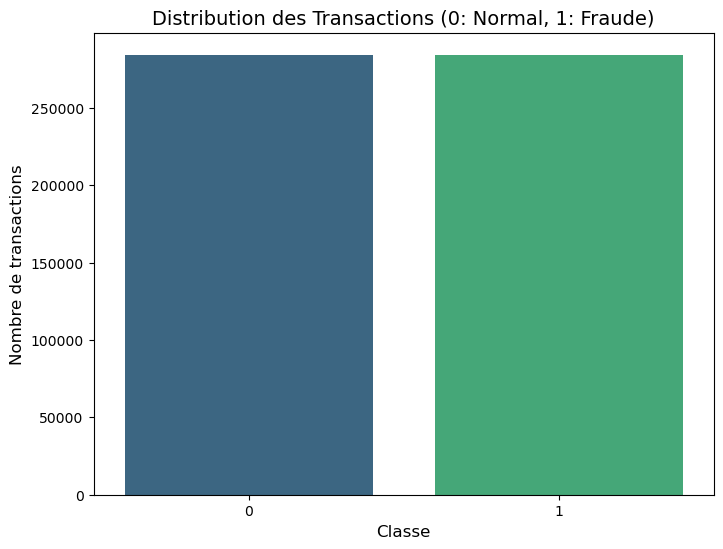

In [7]:
#Histogramme
plt.figure(figsize=(8, 6))
ax = sb.countplot(x='Class', data=data_credit, palette='viridis')
plt.title('Distribution des Transactions (0: Normal, 1: Fraude)', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Nombre de transactions', fontsize=12)


In [8]:
# Montant typique?
data_credit.groupby('Class')['Amount'].describe()
correlation = data_credit.corr()['Class'].sort_values(ascending=False)
correlation

Class     1.000000
id        0.864283
V4        0.735981
V11       0.724278
V2        0.491878
V19       0.244081
V27       0.214002
V20       0.179851
V8        0.144294
V21       0.109640
V28       0.102024
V26       0.071052
V25       0.061847
V22       0.014098
V23       0.010255
Amount    0.002261
V15      -0.037948
V13      -0.071105
V24      -0.130107
V5       -0.338639
V18      -0.410091
V6       -0.435088
V17      -0.476377
V7       -0.491234
V1       -0.505761
V16      -0.573511
V9       -0.585522
V10      -0.673665
V3       -0.682095
V12      -0.768579
V14      -0.805669
Name: Class, dtype: float64

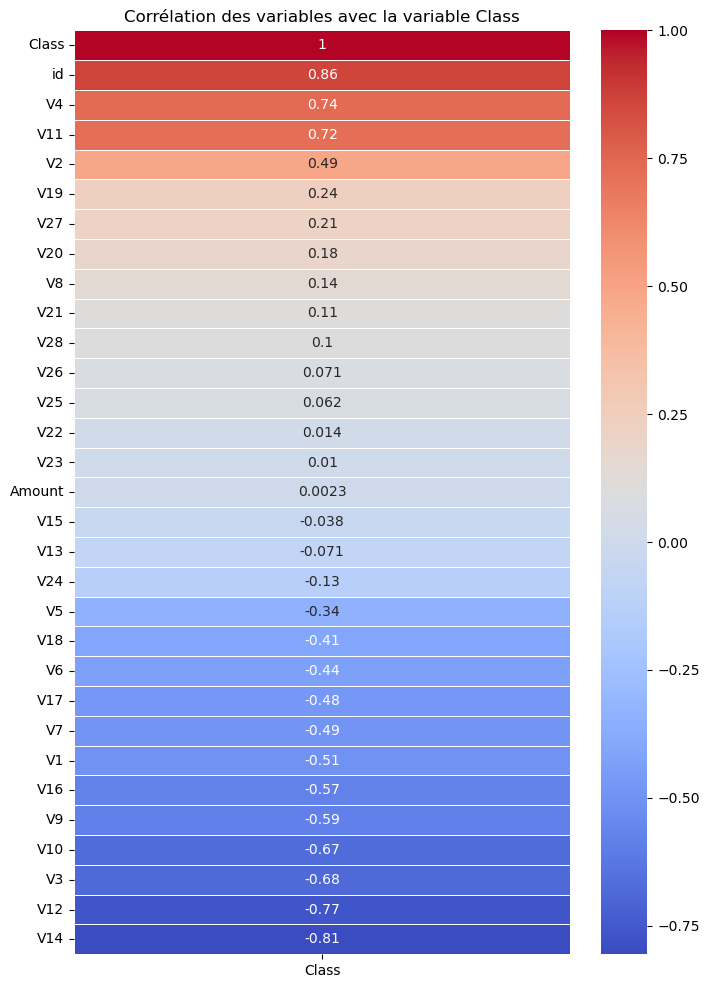

In [9]:
#Matrice de correlation visualisation
correlation_vector = data_credit.corr()[['Class']].sort_values(by='Class', ascending=False)

plt.figure(figsize=(8, 12)) # Plus haut que large pour une colonne
sb.heatmap(correlation_vector, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Corrélation des variables avec la variable Class")
plt.show()

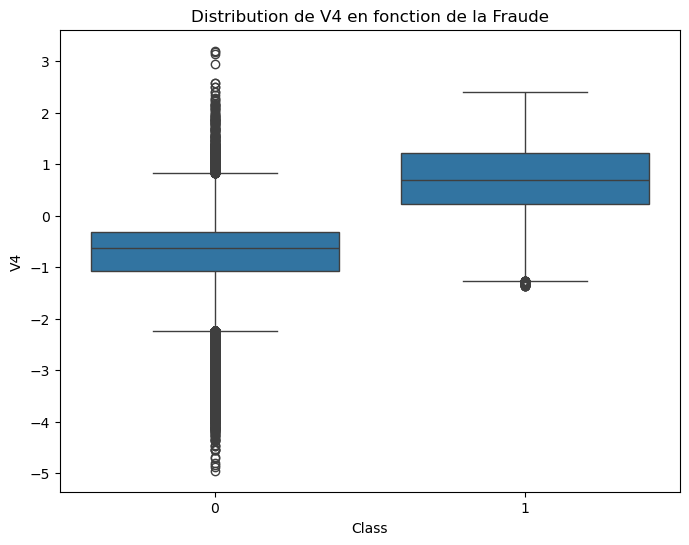

In [10]:
#Observation de V4 correlation positve la plus élevée
plt.figure(figsize=(8, 6))
sb.boxplot(x='Class', y='V4', data=data_credit)
plt.title('Distribution de V4 en fonction de la Fraude')
plt.show()

In [38]:
# description de V4
data_credit.groupby('Class')['V4'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,-0.735981,0.670814,-4.951222,-1.082322,-0.636818,-0.314858,3.201536
1,284315.0,0.735981,0.683137,-1.369576,0.223155,0.682550,1.216940,2.394164


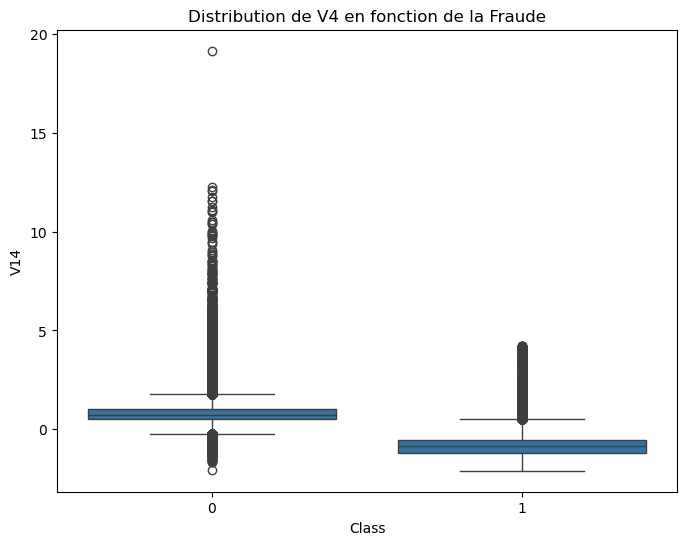

In [11]:
# Observation V14 corrélation négative la plus élevée
plt.figure(figsize=(8, 6))
sb.boxplot(x='Class', y='V14', data=data_credit)
plt.title('Distribution de V4 en fonction de la Fraude')
plt.show()


In [12]:
# description de V14
data_credit.groupby('Class')['V14'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,0.805669,0.539203,-2.045989,0.500319,0.730065,1.008742,19.169544
1,284315.0,-0.805669,0.641137,-2.107417,-1.228537,-0.872700,-0.528915,4.233467


### Etape 3 : Preparation des données

In [13]:
#Reduction de dimensionnalité sélective
important_features = ['V14', 'V4', 'V10', 'V11', 'V12', 'V17', 'V2', 'V3', 'V9', 'V7', 'Amount']

In [14]:
# On isole tes features importantes
X = data_credit[important_features]
y = data_credit['Class']

# Standardisation de l'Amount pour qu'il soit sur la même échelle que les V_n
scaler = StandardScaler()
X.loc[:, 'Amount'] = scaler.fit_transform(X[['Amount']])

/var/folders/ky/y4c0sd9x5nj0xh6hdt3m7tv00000gn/T/ipykernel_41076/1050890091.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[ 0.85844694]
 [-0.79636931]
 [-1.37701093]
 ...
 [ 1.66640101]
 [-0.27185346]
 [ 1.3659619 ]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X.loc[:, 'Amount'] = scaler.fit_transform(X[['Amount']])


In [15]:
# Découpage des données
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.20,     # On prend 20% pour l'examen final
    random_state=42,    # Fixe le hasard pour avoir toujours le même mélange
    stratify=y          # GARANTIT 50% de fraude dans chaque bloc (Crucial !)
)

In [17]:
# Vérification des données
print("Vérification des données:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Distribution train: {y_train.value_counts().to_dict()}")
print(f"Distribution test: {y_test.value_counts().to_dict()}")

Vérification des données:
X_train shape: (454904, 11)
X_test shape: (113726, 11)
Distribution train: {0: 227452, 1: 227452}
Distribution test: {1: 56863, 0: 56863}


### Etape 4: Modélisation 

In [18]:

# Dictionnaire pour stocker les résultats (utile pour comparer plusieurs modèles plus tard)
results = {}
# Regression logistique
start = time.time()
model_LR = LogisticRegression(max_iter=1000)
# Entrainement
model_LR.fit(X_train, y_train)
train_time = time.time() - start
# Stocker le modèle et le temps d'entraînement
results['Logistic Regression'] = {
    'model': model_LR,
    'train_time': train_time
}
print(f" Terminé en {results['Logistic Regression']['train_time']:.2f}s")

 Terminé en 0.31s


In [19]:
# PRÉDICTIONS
y_pred_LR = model_LR.predict(X_test)
y_proba_LR = model_LR.predict_proba(X_test)[:, 1]  # Probabilités pour classe 1 (Fraude)

### Etape 5: Evalution


Vrais Négatifs (TN)  : 55729 (Normal prédit Normal)
Faux Positifs (FP)   :  1134 (Normal prédit Fraude) 
Faux Négatifs (FN)   :  3637 (Fraude prédit Normal) 
Vrais Positifs (TP)  : 53226 (Fraude prédit Fraude)


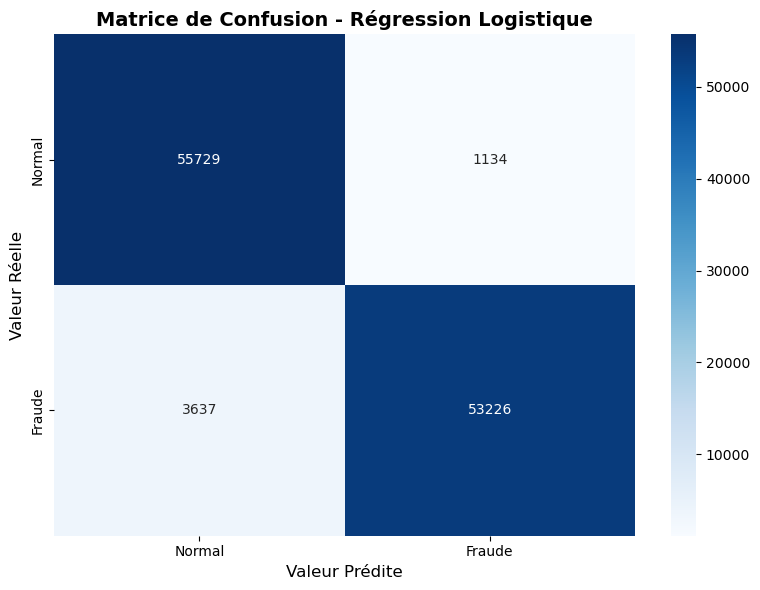

 Métriques calculées à partir de la matrice:
   Accuracy  = (TP + TN) / Total    = 0.9580
   Precision = TP / (TP + FP)       = 0.9791
   Recall    = TP / (TP + FN)       = 0.9360
   F1-Score  = 2×(P×R)/(P+R)        = 0.9571


In [20]:
#ÉVALUATION 1 : MATRICE DE CONFUSION
cm = confusion_matrix(y_test, y_pred_LR)

# Affichage des valeurs
print(f"\nVrais Négatifs (TN)  : {cm[0,0]:>5} (Normal prédit Normal)")
print(f"Faux Positifs (FP)   : {cm[0,1]:>5} (Normal prédit Fraude) ")
print(f"Faux Négatifs (FN)   : {cm[1,0]:>5} (Fraude prédit Normal) ")
print(f"Vrais Positifs (TP)  : {cm[1,1]:>5} (Fraude prédit Fraude)")

# Visualisation
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'])
plt.title('Matrice de Confusion - Régression Logistique', fontsize=14, fontweight='bold')
plt.ylabel('Valeur Réelle', fontsize=12)
plt.xlabel('Valeur Prédite', fontsize=12)
plt.tight_layout()
plt.show()

# Calcul des métriques dérivées et stockage
accuracy = accuracy_score(y_test, y_pred_LR)
precision = precision_score(y_test, y_pred_LR)
recall = recall_score(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)

# Stocker les métriques dans le dictionnaire
results['Logistic Regression']['accuracy'] = accuracy
results['Logistic Regression']['precision'] = precision
results['Logistic Regression']['recall'] = recall
results['Logistic Regression']['f1'] = f1

print(f" Métriques calculées à partir de la matrice:")
print(f"   Accuracy  = (TP + TN) / Total    = {accuracy:.4f}")
print(f"   Precision = TP / (TP + FP)       = {precision:.4f}")
print(f"   Recall    = TP / (TP + FN)       = {recall:.4f}")
print(f"   F1-Score  = 2×(P×R)/(P+R)        = {f1:.4f}")


 AUC-ROC Score: 0.9907


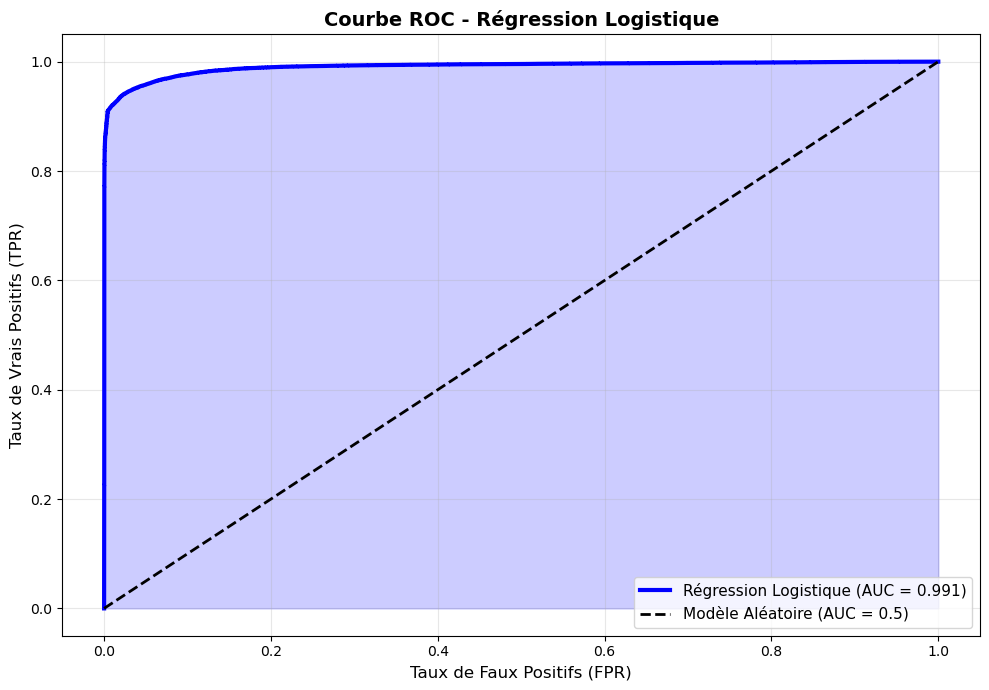

In [21]:
# ÉVALUATION 2 : AUC-ROC

# Calcul de l'AUC
auc_score = roc_auc_score(y_test, y_proba_LR)

# Stocker l'AUC dans le dictionnaire
results['Logistic Regression']['auc'] = auc_score

print(f" AUC-ROC Score: {auc_score:.4f}")

# Interprétation
if auc_score >= 0.9:
    interpretation = "Excellent modèle ! "
elif auc_score >= 0.8:
    interpretation = "Très bon modèle "
elif auc_score >= 0.7:
    interpretation = "Bon modèle "
elif auc_score >= 0.6:
    interpretation = "Modèle acceptable "
else:
    interpretation = "Modèle faible "

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_LR)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, linewidth=3, label=f'Régression Logistique (AUC = {auc_score:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Modèle Aléatoire (AUC = 0.5)')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')

plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - Régression Logistique', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

\ Résultats de la Validation Croisée (5-Fold):

   Accuracy:
      Scores par fold: ['0.9563', '0.9587', '0.9588', '0.9585', '0.9587']
      Moyenne: 0.9582 ± 0.0010

   Precision:
      Scores par fold: ['0.9794', '0.9809', '0.9795', '0.9785', '0.9798']
      Moyenne: 0.9796 ± 0.0008

   Recall:
      Scores par fold: ['0.9322', '0.9356', '0.9373', '0.9376', '0.9367']
      Moyenne: 0.9359 ± 0.0020

   F1-Score:
      Scores par fold: ['0.9552', '0.9577', '0.9579', '0.9576', '0.9578']
      Moyenne: 0.9573 ± 0.0010

   ROC-AUC:
      Scores par fold: ['0.9907', '0.9906', '0.9911', '0.9908', '0.9905']
      Moyenne: 0.9907 ± 0.0002


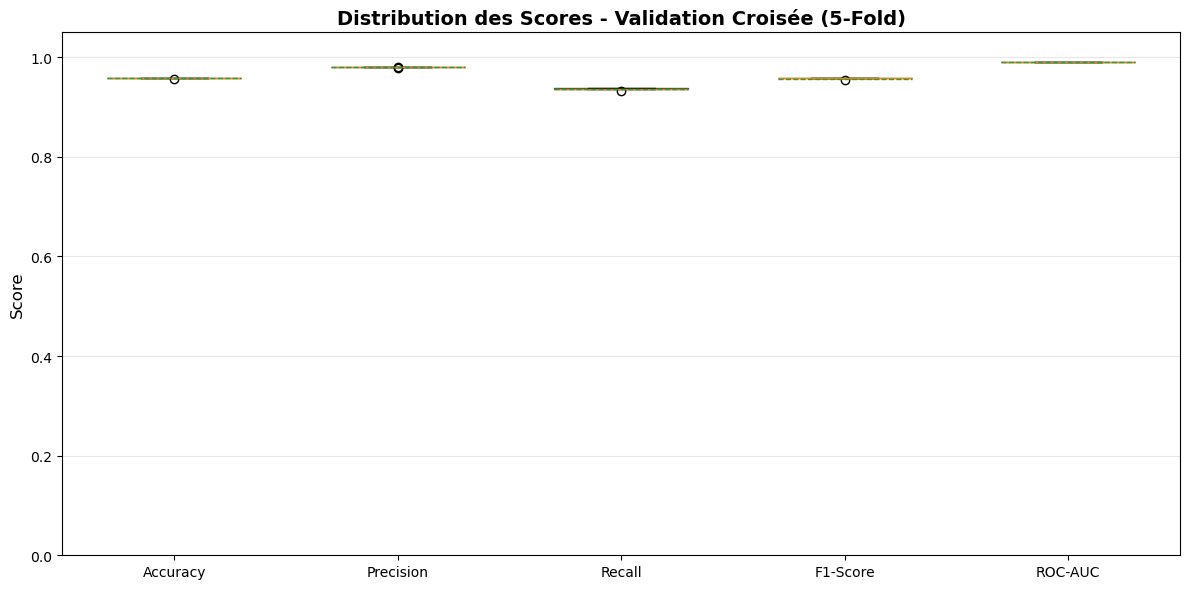

In [22]:
# EVALUATION : METHODE DE VALIDATION CROISEE

# Validation croisée avec 5 folds
cv_scores_accuracy = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='f1')
cv_scores_roc_auc = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='roc_auc')

# Stocker les résultats de validation croisée
results['Logistic Regression']['cv_accuracy'] = cv_scores_accuracy.mean()
results['Logistic Regression']['cv_accuracy_std'] = cv_scores_accuracy.std()
results['Logistic Regression']['cv_precision'] = cv_scores_precision.mean()
results['Logistic Regression']['cv_recall'] = cv_scores_recall.mean()
results['Logistic Regression']['cv_f1'] = cv_scores_f1.mean()
results['Logistic Regression']['cv_roc_auc'] = cv_scores_roc_auc.mean()

print("\ Résultats de la Validation Croisée (5-Fold):")
print(f"\n   Accuracy:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_accuracy]}")
print(f"      Moyenne: {cv_scores_accuracy.mean():.4f} ± {cv_scores_accuracy.std():.4f}")

print(f"\n   Precision:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_precision]}")
print(f"      Moyenne: {cv_scores_precision.mean():.4f} ± {cv_scores_precision.std():.4f}")

print(f"\n   Recall:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_recall]}")
print(f"      Moyenne: {cv_scores_recall.mean():.4f} ± {cv_scores_recall.std():.4f}")

print(f"\n   F1-Score:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_f1]}")
print(f"      Moyenne: {cv_scores_f1.mean():.4f} ± {cv_scores_f1.std():.4f}")

print(f"\n   ROC-AUC:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_roc_auc]}")
print(f"      Moyenne: {cv_scores_roc_auc.mean():.4f} ± {cv_scores_roc_auc.std():.4f}")

# Visualisation des scores de validation croisée
fig, ax = plt.subplots(figsize=(12, 6))

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
cv_scores_list = [cv_scores_accuracy, cv_scores_precision, cv_scores_recall, 
                  cv_scores_f1, cv_scores_roc_auc]

positions = np.arange(len(metrics_names))
bp = ax.boxplot(cv_scores_list, positions=positions, widths=0.6, patch_artist=True,
                showmeans=True, meanline=True)

# Couleurs
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax.set_xticklabels(metrics_names)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Distribution des Scores - Validation Croisée (5-Fold)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 1.05)
plt.tight_layout()
plt.show()

### Etape 6: Interpretation 

In [90]:
# RAPPORT FINAL

print("RAPPORT FINAL - RÉGRESSION LOGISTIQUE")

print(" Performance sur le Test Set:")
print(f"   Accuracy:  {accuracy:.4f}")
print(f"   Precision: {precision:.4f}")
print(f"   Recall:    {recall:.4f}")
print(f"   F1-Score:  {f1:.4f}")
print(f"   AUC-ROC:   {auc_score:.4f}")

print(" Performance Validation Croisée (moyenne ± écart-type):")
print(f"   Accuracy:  {cv_scores_accuracy.mean():.4f} ± {cv_scores_accuracy.std():.4f}")
print(f"   Precision: {cv_scores_precision.mean():.4f} ± {cv_scores_precision.std():.4f}")
print(f"   Recall:    {cv_scores_recall.mean():.4f} ± {cv_scores_recall.std():.4f}")
print(f"   F1-Score:  {cv_scores_f1.mean():.4f} ± {cv_scores_f1.std():.4f}")
print(f"   ROC-AUC:   {cv_scores_roc_auc.mean():.4f} ± {cv_scores_roc_auc.std():.4f}")

print(f" Temps d'entraînement: {train_time:.2f}s")

print(" Interprétation:")
print(f"    Le modèle est {'stable' if cv_scores_f1.std() < 0.05 else 'variable'} (écart-type F1 = {cv_scores_f1.std():.4f})")
print(f"   AUC-ROC de {auc_score:.4f} indique une {'excellente' if auc_score >= 0.9 else 'bonne'} capacité de discrimination")
print(f"   Recall de {recall:.4f} signifie que {recall*100:.1f}% des fraudes sont détectées")

print(" Évaluation complète terminée !")



RAPPORT FINAL - RÉGRESSION LOGISTIQUE
 Performance sur le Test Set:
   Accuracy:  0.9580
   Precision: 0.9791
   Recall:    0.9360
   F1-Score:  0.9571
   AUC-ROC:   0.9907
 Performance Validation Croisée (moyenne ± écart-type):
   Accuracy:  0.9582 ± 0.0010
   Precision: 0.9796 ± 0.0008
   Recall:    0.9359 ± 0.0020
   F1-Score:  0.9573 ± 0.0010
   ROC-AUC:   0.9907 ± 0.0002
 Temps d'entraînement: 0.35s

💡 Interprétation:
   • Le modèle est stable (écart-type F1 = 0.0010)
   • AUC-ROC de 0.9907 indique une excellente capacité de discrimination
   • Recall de 0.9360 signifie que 93.6% des fraudes sont détectées
 Évaluation complète terminée !


In [25]:
#Dictionnaire
print("CONTENU DU DICTIONNAIRE RESULTS")
print("\nresults['Logistic Regression'] = {")
for key, value in results['Logistic Regression'].items():
    if key == 'model':
        print(f"    '{key}': {type(value).__name__},")
    else:
        print(f"    '{key}': {value:.4f}," if isinstance(value, float) else f"    '{key}': {value},")
print("}")

CONTENU DU DICTIONNAIRE RESULTS

results['Logistic Regression'] = {
    'model': LogisticRegression,
    'train_time': 0.3120,
    'accuracy': 0.9580,
    'precision': 0.9791,
    'recall': 0.9360,
    'f1': 0.9571,
    'auc': 0.9907,
    'cv_accuracy': 0.9582,
    'cv_accuracy_std': 0.0010,
    'cv_precision': 0.9796,
    'cv_recall': 0.9359,
    'cv_f1': 0.9573,
    'cv_roc_auc': 0.9907,
}
